# Linear Discriminant Analysis

Libraries

In [1]:
import numpy as np  # linear algebra
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
number_of_persons = 40

In [2]:
def read_single_image(image_path):
    ans = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'

        for i in range(10304):
            ans.append(ord(f.read(1)))

    return ans

# Create the Data Matrix and Label Vector

In [3]:
def construct_data_frame():
    images = []
    persons = []

    path = "C:\\Users\\DELL\\Desktop\\Pattern_Lab1\\archive\\"
    print('Reading Started')
    for x in range(1, number_of_persons + 1):
        current_person_path = path + 's' + str(x) + '/'
        for y in range(1, 11):
            persons.append(str(x))
            images.append(read_single_image(current_person_path + str(y) + '.pgm'))

    images = np.array(images)

    return images, persons

# Split Data odd rows for training and even rows for testing

In [4]:
def split_data(D, labels):
    train_Data = []
    train_Label = []
    test_Data = []
    test_Label = []
    for i in range(len(D)):
        if i % 2 == 1:
            train_Data.append(D[i])
            train_Label.append(labels[i])
        else:
            test_Data.append(D[i])
            test_Label.append(labels[i])
    return np.array(train_Data), np.array(train_Label), np.array(test_Data), np.array(test_Label)

# LDA

In [5]:
def LDA(Data, label, eigen_values_count=39):
    print(eigen_values_count)
    Data = np.array(Data)
    label = np.array(label)
    unique_values, count = np.unique(label, return_counts=True)
    number_of_classes = len(np.unique(label))
    print("Number of Classes = ", number_of_classes)
    number_of_features = len(Data[0])

    # Calculate Means for every class
    means = np.zeros((number_of_classes, number_of_features))

    for i in range(1, number_of_classes + 1):
        data = Data[np.where(label == str(i))]
        meanI = np.mean(data, axis=0)
        means[i - 1] = meanI

    # Calculate mean for each feature
    mean = np.mean(Data, axis=0)

    # Calculate Sb
    Sb = np.zeros((number_of_features, number_of_features))
    for i in range(number_of_classes):
        x = np.array(means[i] - mean).reshape(number_of_features, 1)
        y = x.dot(x.T) * count[i]
        Sb = np.add(Sb, y)

    # Calculate S
    S = np.zeros((number_of_features, number_of_features))
    for i in range(number_of_classes):
        dataI = Data[label == str(i + 1)]
        Zi = np.array(dataI - means[i])
        S += Zi.T.dot(Zi)

    # Calculate Eigen Values and Eigen Vectors

    inverse = scipy.linalg.pinv(S)

    X = inverse.dot(Sb)

    eigen_Values, eigen_Vectors = np.linalg.eig(X)

    idx = eigen_Values.argsort()[::-1]
    eigen_Values = eigen_Values[idx]
    eigen_Vectors = eigen_Vectors[:, idx]
    print("Eigen Values = ", eigen_Values)
    print("Eigen Vectors = ", eigen_Vectors)
    eigen_Vectors = np.real(eigen_Vectors)

    U = eigen_Vectors[:, 0:eigen_values_count]
    print("U = ",U)
    return U

# Calculate the Accuracy using KNN classifier using different Ks and Plot a graph

In [6]:
def calc_Accuracy(Projected_train_Data, Projected_test_Data, train_Label, test_Label):
    K = [1, 3, 5, 7]
    accuracies = []

    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Projected_train_Data, train_Label)
        predicted_labels = knn.predict(Projected_test_Data)
        acc = accuracy_score(test_Label, predicted_labels)
        accuracies.append(acc)

        print("Accuracy = ", acc, "  at k = ", i)

    # Plotting accuracy against K
    plt.plot(K, accuracies, marker='o')
    plt.title('Accuracy vs. K')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.xticks(K)
    plt.grid(True)
    plt.show()

# RUN LDA and project the training and test Data using the 39 Eigen Vectors corresponding to the Highest 39 Eigen Values then calculate the Accuracy

Reading Started
[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 39  44  53 ...  29  26  29]
 ...
 [125 119 124 ...  36  39  40]
 [119 120 120 ...  89  94  85]
 [125 124 124 ...  36  35  34]]
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '15', '15',

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy =  0.96   at k =  1
Accuracy =  0.885   at k =  3
Accuracy =  0.9   at k =  5
Accuracy =  0.92   at k =  7


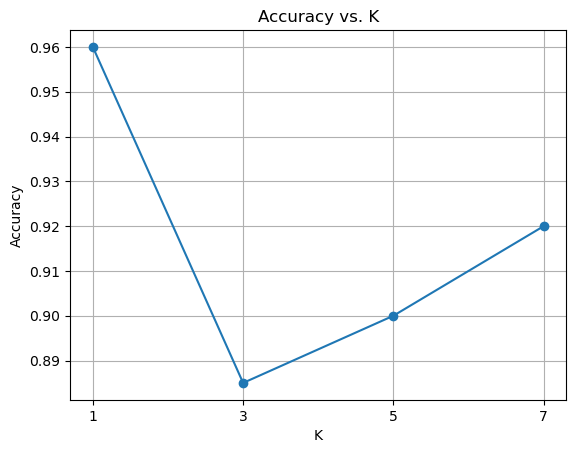

In [7]:
(D, labels) = construct_data_frame()

print(D)
print(labels)
(train_Data, train_Label, test_Data, test_Label) = split_data(D, labels)

U = LDA(train_Data, train_Label, eigen_values_count=39)

Projected_train_Data = train_Data.dot(U)  # ==  ((U.T).dot(train_Data.T)).T
Projected_test_Data = test_Data.dot(U)

calc_Accuracy(Projected_train_Data, Projected_test_Data,train_Label ,test_Label)